In [ ]:
import pandas as pd
import numpy as np
import os
# plot
import matplotlib.pyplot as plt
import seaborn as sns
#preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
#modelování
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import pickle
#vyhodnocení
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score

### Spojení dat

In [ ]:
sloupce = ['ticker',
 'Revenue',
 'Revenue Growth',
 'Cost of Revenue',
 'Gross Profit',
 'R&D Expenses',
 'SG&A Expense',
 'Operating Expenses',
 'Operating Income',
 'Interest Expense',
 'Earnings before Tax',
 'Income Tax Expense',
 'Net Income - Non-Controlling int',
 'Net Income - Discontinued ops',
 'Net Income',
 'Preferred Dividends',
 'Net Income Com',
 'EPS',
 'EPS Diluted',
 'Weighted Average Shs Out',
 'Weighted Average Shs Out (Dil)',
 'Dividend per Share',
 'Gross Margin',
 'EBITDA Margin',
 'EBIT Margin',
 'Profit Margin',
 'Free Cash Flow margin',
 'EBITDA',
 'EBIT',
 'Consolidated Income',
 'Earnings Before Tax Margin',
 'Net Profit Margin',
 'Cash and cash equivalents',
 'Short-term investments',
 'Cash and short-term investments',
 'Receivables',
 'Inventories',
 'Total current assets',
 'Property, Plant & Equipment Net',
 'Goodwill and Intangible Assets',
 'Long-term investments',
 'Tax assets',
 'Total non-current assets',
 'Total assets',
 'Payables',
 'Short-term debt',
 'Total current liabilities',
 'Long-term debt',
 'Total debt',
 'Deferred revenue',
 'Tax Liabilities',
 'Deposit Liabilities',
 'Total non-current liabilities',
 'Total liabilities',
 'Other comprehensive income',
 'Retained earnings (deficit)',
 'Total shareholders equity',
 'Investments',
 'Net Debt',
 'Other Assets',
 'Other Liabilities',
 'Depreciation & Amortization',
 'Stock-based compensation',
 'Operating Cash Flow',
 'Capital Expenditure',
 'Acquisitions and disposals',
 'Investment purchases and sales',
 'Investing Cash flow',
 'Issuance (repayment) of debt',
 'Issuance (buybacks) of shares',
 'Dividend payments',
 'Financing Cash Flow',
 'Effect of forex changes on cash',
 'Net cash flow / Change in cash',
 'Free Cash Flow',
 'Net Cash/Marketcap',
 'priceBookValueRatio',
 'priceToBookRatio',
 'priceToSalesRatio',
 'priceEarningsRatio',
 'priceToFreeCashFlowsRatio',
 'priceToOperatingCashFlowsRatio',
 'priceCashFlowRatio',
 'priceEarningsToGrowthRatio',
 'priceSalesRatio',
 'dividendYield',
 'enterpriseValueMultiple',
 'priceFairValue',
 'ebitperRevenue',
 'ebtperEBIT',
 'niperEBT',
 'grossProfitMargin',
 'operatingProfitMargin',
 'pretaxProfitMargin',
 'netProfitMargin',
 'effectiveTaxRate',
 'returnOnAssets',
 'returnOnEquity',
 'returnOnCapitalEmployed',
 'nIperEBT',
 'eBTperEBIT',
 'eBITperRevenue',
 'payablesTurnover',
 'inventoryTurnover',
 'fixedAssetTurnover',
 'assetTurnover',
 'currentRatio',
 'quickRatio',
 'cashRatio',
 'daysOfSalesOutstanding',
 'daysOfInventoryOutstanding',
 'operatingCycle',
 'daysOfPayablesOutstanding',
 'cashConversionCycle',
 'debtRatio',
 'debtEquityRatio',
 'longtermDebtToCapitalization',
 'totalDebtToCapitalization',
 'interestCoverage',
 'cashFlowToDebtRatio',
 'companyEquityMultiplier',
 'operatingCashFlowPerShare',
 'freeCashFlowPerShare',
 'cashPerShare',
 'payoutRatio',
 'operatingCashFlowSalesRatio',
 'freeCashFlowOperatingCashFlowRatio',
 'cashFlowCoverageRatios',
 'shortTermCoverageRatios',
 'capitalExpenditureCoverageRatios',
 'dividendpaidAndCapexCoverageRatios',
 'dividendPayoutRatio',
 'Revenue per Share',
 'Net Income per Share',
 'Operating Cash Flow per Share',
 'Free Cash Flow per Share',
 'Cash per Share',
 'Book Value per Share',
 'Tangible Book Value per Share',
 'Shareholders Equity per Share',
 'Interest Debt per Share',
 'Market Cap',
 'Enterprise Value',
 'PE ratio',
 'Price to Sales Ratio',
 'POCF ratio',
 'PFCF ratio',
 'PB ratio',
 'PTB ratio',
 'EV to Sales',
 'Enterprise Value over EBITDA',
 'EV to Operating cash flow',
 'EV to Free cash flow',
 'Earnings Yield',
 'Free Cash Flow Yield',
 'Debt to Equity',
 'Debt to Assets',
 'Net Debt to EBITDA',
 'Current ratio',
 'Interest Coverage',
 'Income Quality',
 'Dividend Yield',
 'Payout Ratio',
 'SG&A to Revenue',
 'R&D to Revenue',
 'Intangibles to Total Assets',
 'Capex to Operating Cash Flow',
 'Capex to Revenue',
 'Capex to Depreciation',
 'Stock-based compensation to Revenue',
 'Graham Number',
 'ROIC',
 'Return on Tangible Assets',
 'Graham Net-Net',
 'Working Capital',
 'Tangible Asset Value',
 'Net Current Asset Value',
 'Invested Capital',
 'Average Receivables',
 'Average Payables',
 'Average Inventory',
 'Days Sales Outstanding',
 'Days Payables Outstanding',
 'Days of Inventory on Hand',
 'Receivables Turnover',
 'Payables Turnover',
 'Inventory Turnover',
 'ROE',
 'Capex per Share',
 'Gross Profit Growth',
 'EBIT Growth',
 'Operating Income Growth',
 'Net Income Growth',
 'EPS Growth',
 'EPS Diluted Growth',
 'Weighted Average Shares Growth',
 'Weighted Average Shares Diluted Growth',
 'Dividends per Share Growth',
 'Operating Cash Flow growth',
 'Free Cash Flow growth',
 '10Y Revenue Growth (per Share)',
 '5Y Revenue Growth (per Share)',
 '3Y Revenue Growth (per Share)',
 '10Y Operating CF Growth (per Share)',
 '5Y Operating CF Growth (per Share)',
 '3Y Operating CF Growth (per Share)',
 '10Y Net Income Growth (per Share)',
 '5Y Net Income Growth (per Share)',
 '3Y Net Income Growth (per Share)',
 '10Y Shareholders Equity Growth (per Share)',
 '5Y Shareholders Equity Growth (per Share)',
 '3Y Shareholders Equity Growth (per Share)',
 '10Y Dividend per Share Growth (per Share)',
 '5Y Dividend per Share Growth (per Share)',
 '3Y Dividend per Share Growth (per Share)',
 'Receivables growth',
 'Inventory Growth',
 'Asset Growth',
 'Book Value per Share Growth',
 'Debt Growth',
 'R&D Expense Growth',
 'SG&A Expenses Growth',
 'Sector',
 'EoY PRICE VAR [%]',
 'Class']

In [ ]:
# ve které složce jsou data
slozka = "data"
# základní dataframe, ke kterému budu přidávat načtená data
data = pd.DataFrame(columns=sloupce)
# pro každý soubor ze složky
for soubor in os.listdir(slozka):
    # vyčti rok ze jména souboru
    rok = int(soubor.split("_")[0])
    # načti soubor a přejmenuj sloupce
    nacteny_soubor = pd.read_csv(slozka + os.sep + soubor).rename(columns={f'{rok + 1} PRICE VAR [%]': 'EoY PRICE VAR [%]', "Unnamed: 0": "ticker"})
    # připoj načtený soubor do dat
    data = pd.concat([data, nacteny_soubor], ignore_index=True)

data.to_csv('Komplet_Financial_Data.csv', index=False)

<ipython-input-11-67713a0c26b2>:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  data = pd.concat([data, nacteny_soubor], ignore_index=True)


### Načtení dat

In [ ]:
df = pd.read_csv('Komplet_Financial_Data.csv')

# Overenie načítania dát
print(df.head())  # Zobrazenie prvých 5 riadkov
print(df.info())  # Informácie o dátach a stĺpcoch

  ticker       Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
0  CMCSA  9.450700e+10          0.1115     0.000000e+00  9.450700e+10   
1    KMI  1.414400e+10          0.0320     7.288000e+09  6.856000e+09   
2   INTC  7.084800e+10          0.1289     2.711100e+10  4.373700e+10   
3     MU  3.039100e+10          0.4955     1.250000e+10  1.789100e+10   
4     GE  1.216150e+11          0.0285     9.546100e+10  2.615400e+10   

   R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
0  0.000000e+00  6.482200e+10        7.549800e+10      1.900900e+10   
1  0.000000e+00  6.010000e+08        3.062000e+09      3.794000e+09   
2  1.354300e+10  6.750000e+09        2.042100e+10      2.331600e+10   
3  2.141000e+09  8.130000e+08        2.897000e+09      1.499400e+10   
4  0.000000e+00  1.811100e+10        4.071100e+10     -1.455700e+10   

   Interest Expense  ...  Receivables growth  Inventory Growth  Asset Growth  \
0      3.542000e+09  ...              0.2570          

In [ ]:
print(df.describe())

            Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
count  2.090600e+04    19989.000000     2.030600e+04  2.087000e+04   
mean   5.161619e+09        3.622214     3.258565e+09  1.970452e+09   
std    3.197314e+10      312.648170     2.583092e+10  8.735750e+09   
min   -6.276160e+08      -12.769300    -2.986888e+09 -1.280800e+10   
25%    5.880737e+07       -0.014700     3.211750e+06  3.035575e+07   
50%    4.352510e+08        0.057600     1.530115e+08  1.943525e+08   
75%    2.287259e+09        0.182400     1.180224e+09  8.806035e+08   
max    1.886894e+12    42138.663900     1.581527e+12  4.621600e+11   

       R&D Expenses  SG&A Expense  Operating Expenses  Operating Income  \
count  1.993900e+04  2.040800e+04        2.037500e+04      2.097600e+04   
mean   1.033333e+08  8.699279e+08        1.368670e+09      5.896979e+08   
std    7.676062e+08  3.804283e+09        5.662984e+09      2.976454e+09   
min   -1.098000e+08 -1.401594e+08       -5.495512e+09     -1.933900e+

In [ ]:
# chybějící hodnoty
print(df.isnull().sum())
missing_percentage = (df.isnull().sum() / len(df)) * 100
# v procentech
print(missing_percentage)

ticker                     0
Revenue                 1171
Revenue Growth          2088
Cost of Revenue         1771
Gross Profit            1207
                        ... 
R&D Expense Growth      2479
SG&A Expenses Growth    2422
Sector                     0
EoY PRICE VAR [%]          0
Class                      0
Length: 225, dtype: int64
ticker                   0.000000
Revenue                  5.304163
Revenue Growth           9.457807
Cost of Revenue          8.021923
Gross Profit             5.467228
                          ...    
R&D Expense Growth      11.228881
SG&A Expenses Growth    10.970693
Sector                   0.000000
EoY PRICE VAR [%]        0.000000
Class                    0.000000
Length: 225, dtype: float64


In [ ]:
# najdi všechny textové sloupce
for sloupec in df.columns:
    if df[sloupec].dtypes == "O":
        print(sloupec)

ticker
Sector


In [ ]:
# ticker konkrétní firmy nebereme pro predikce
del df["ticker"]

In [ ]:
# kolik unikátních sektorů?
unique_count = df['Sector'].nunique()
print(f'Počet unikátnych hodnôt: {unique_count}')
# Zobraziť unikátne hodnoty
print(df['Sector'].unique())

Počet unikátnych hodnôt: 11
['Consumer Cyclical' 'Energy' 'Technology' 'Industrials'
 'Financial Services' 'Basic Materials' 'Communication Services'
 'Consumer Defensive' 'Healthcare' 'Real Estate' 'Utilities']


In [ ]:
# Aplikovať One-Hot Encoding na správny stĺpec
df_encoded = pd.get_dummies(df, columns=['Sector'], dtype=int)

In [ ]:
correlation_matrix = df_encoded.corr()
# Zobrazenie korelačnej matice
print(correlation_matrix)

                     Revenue  Revenue Growth  Cost of Revenue  Gross Profit  \
Revenue             1.000000       -0.002762         0.978873      0.803631   
Revenue Growth     -0.002762        1.000000        -0.002322     -0.002995   
Cost of Revenue     0.978873       -0.002322         1.000000      0.664948   
Gross Profit        0.803631       -0.002995         0.664948      1.000000   
R&D Expenses        0.342421       -0.001327         0.277569      0.460968   
...                      ...             ...              ...           ...   
Sector_Healthcare  -0.025351        0.005605        -0.020154     -0.037543   
Sector_Industrials -0.015760       -0.004122        -0.011886     -0.026604   
Sector_Real Estate -0.033306       -0.002348        -0.026326     -0.041915   
Sector_Technology  -0.020081       -0.004292        -0.019353     -0.020697   
Sector_Utilities    0.000783       -0.001783         0.001630     -0.003323   

                    R&D Expenses  SG&A Expense  Ope

In [47]:
# korelácia cieľovej premennej 'Class'
target_corr = correlation_matrix['Class'].sort_values(ascending=False)
top_20_corr = target_corr.head(20)
print(top_20_corr)

Class                                         1.000000
operatingCycle                                0.288801
cashConversionCycle                           0.101949
Sector_Financial Services                     0.084722
10Y Shareholders Equity Growth (per Share)    0.077856
10Y Revenue Growth (per Share)                0.076761
10Y Operating CF Growth (per Share)           0.069861
5Y Revenue Growth (per Share)                 0.065612
10Y Net Income Growth (per Share)             0.064099
Enterprise Value                              0.057766
5Y Operating CF Growth (per Share)            0.055498
5Y Dividend per Share Growth (per Share)      0.055429
5Y Net Income Growth (per Share)              0.049727
3Y Dividend per Share Growth (per Share)      0.049497
10Y Dividend per Share Growth (per Share)     0.048844
Sector_Utilities                              0.047351
Gross Margin                                  0.040388
Earnings before Tax                           0.039266
Sector_Rea

<ipython-input-48-46eb1de5be3b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_corr.index, y=top_20_corr.values, palette='coolwarm')


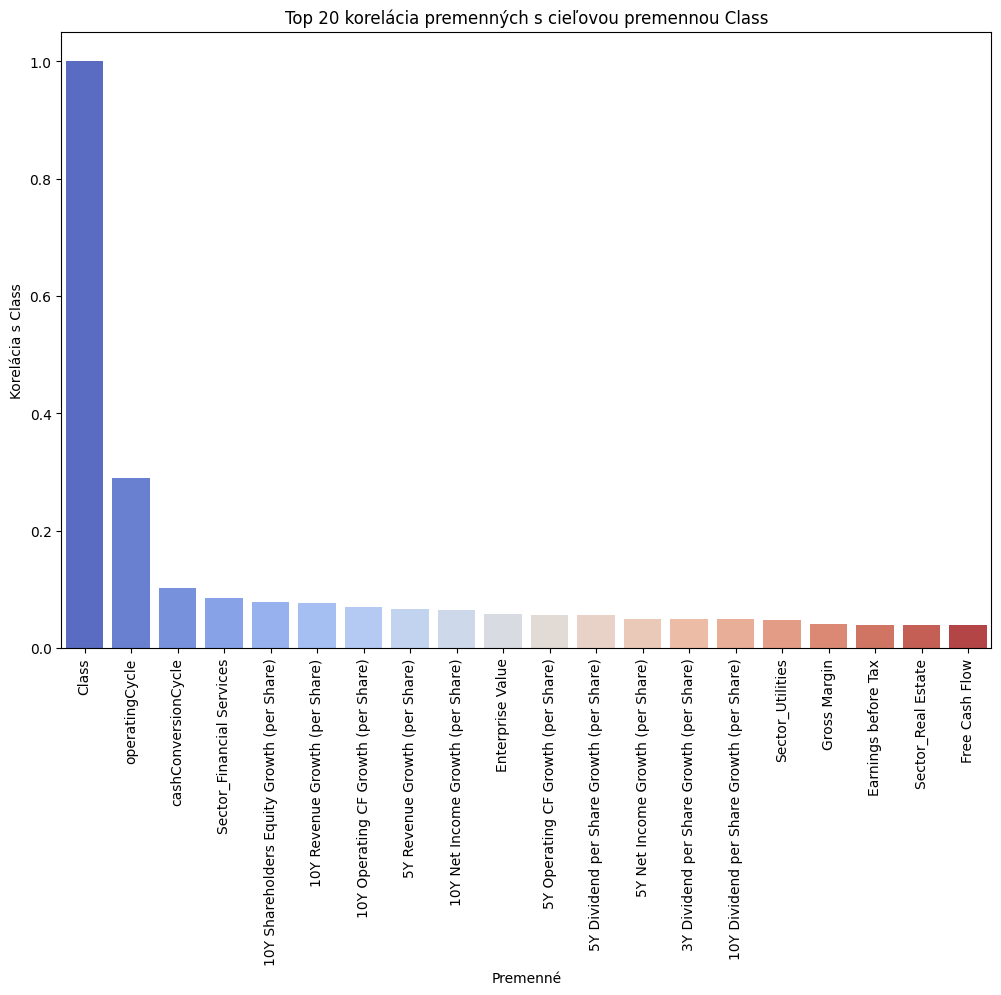

In [48]:
# vizualizácia korelácie cieľovej premennej 'Class'
plt.figure(figsize=(12, 8))
sns.barplot(x=top_20_corr.index, y=top_20_corr.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Premenné')
plt.ylabel('Korelácia s Class')
plt.title('Top 20 korelácia premenných s cieľovou premennou Class')
plt.show()

In [67]:
# oddelenie cieľovej premennej a funkcií
X = df_encoded.drop(columns=['Class'])
y = df_encoded['Class']

# rozdelenie dát na trénovaciu a testovaciu množinu
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [76]:
from sklearn.preprocessing import MinMaxScaler

# Inicializácia škálovača
scaler = MinMaxScaler()

# Fit a transformácia trénovacích dát, transformácia testovacích dát
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [72]:
print("Chýbajúce hodnoty v X_train:")
print(pd.DataFrame(X_train).isnull().sum())

print("Chýbajúce hodnoty v X_test:")
print(pd.DataFrame(X_test).isnull().sum())

Chýbajúce hodnoty v X_train:
Revenue                790
Revenue Growth        1415
Cost of Revenue       1213
Gross Profit           818
R&D Expenses          1435
                      ... 
Sector_Healthcare        0
Sector_Industrials       0
Sector_Real Estate       0
Sector_Technology        0
Sector_Utilities         0
Length: 233, dtype: int64
Chýbajúce hodnoty v X_test:
Revenue               381
Revenue Growth        673
Cost of Revenue       558
Gross Profit          389
R&D Expenses          703
                     ... 
Sector_Healthcare       0
Sector_Industrials      0
Sector_Real Estate      0
Sector_Technology       0
Sector_Utilities        0
Length: 233, dtype: int64


In [77]:
# Odstránenie riadkov s chýbajúcimi hodnotami z X_train
X_train_clean = pd.DataFrame(X_train).dropna()
y_train_clean = y_train[X_train_clean.index]

# Odstránenie riadkov s chýbajúcimi hodnotami z X_test
X_test_clean = pd.DataFrame(X_test).dropna()
y_test_clean = y_test[X_test_clean.index]